# Imports

In [1]:
import os

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from minisom import MiniSom as SOM
import matplotlib.pyplot as plt

print("Libraries imported.")

Libraries imported.


# Constants

In [2]:
DATA_DIRECTORY = r"C:\Users\Daniel\Documents\Studium\7. Semester (WS 2020.21)\Seminar Data Mining in der Produktion\Gruppenarbeit\Data"
NORMALIZATION_NORM = "l2"
TEST_TRAIN_SPLIT = 0.2
RANDOM_SEED = 1     # for reproducibility

# Rule-based anomaly detection
ANOMALY_THRESHOLD = 10

print("Constants set.")

Constants set.


# Self-organizing map (SOM)
### Training

In [5]:
SOM_MAP_X_DIMENSION = 20      # 50 as taken from research paper
SOM_MAP_Y_DIMENSION = 20     # 50 as taken from research paper
SOM_TRAINING_EPOCHS = 10000

def train_model(training_data):
    model = SOM(x=SOM_MAP_X_DIMENSION, y=SOM_MAP_Y_DIMENSION, input_len=training_data.shape[1], random_seed=RANDOM_SEED)
    model.train(training_data, num_iteration=SOM_TRAINING_EPOCHS, verbose=True)
    return model

models = [train_model(train) for train in train_files]

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.025181303876307237
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.01915055279907774
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.029744565932505965
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.017274444260484294
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.02955332186792993
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.03898049944397277
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.029527235162928978
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.022152789189689697


### Activation on training data (above) and test data (below)

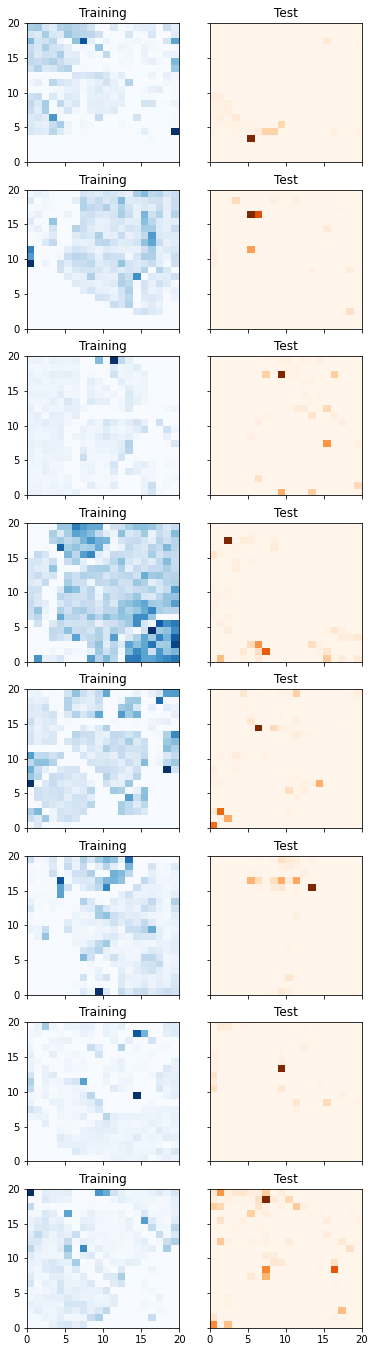

In [6]:
%matplotlib inline

fig, ax = plt.subplots(8, 2, sharex=True, sharey=True)
fig.set_size_inches(6, 24)

i = 0
for model in models:
    frequencies = model.activation_response(train_files[i])
    ax[i, 0].pcolor(frequencies.T, cmap='Blues')
    ax[i, 0].set_title("Training")
    #plt.colorbar()

    frequencies = model.activation_response(test_files[i])
    ax[i, 1].pcolor(frequencies.T, cmap='Oranges')
    ax[i, 1].set_title("Test")
    #plt.colorbar()

    i += 1

plt.show()

# Plot quantization errors

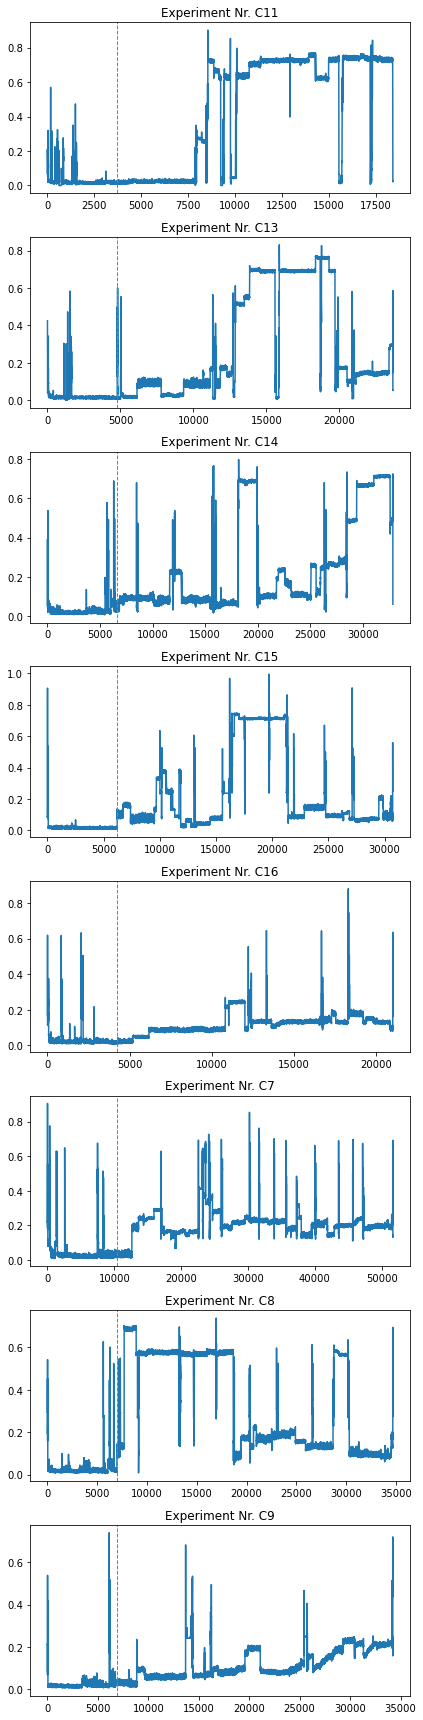

In [14]:
quantization_errors = [[models[j].quantization_error(files[j][i:i+1]) for i in range(len(files[j]) - 1)] for j in range(len(files))]
experiment_names = ['C11', 'C13', 'C14', 'C15', 'C16', 'C7', 'C8', 'C9']

plot_all_experiments(quantization_errors, experiment_names, plot_test_train_split=True, savefig=False)